In [153]:
import numpy as np
import math as m
from matplotlib import pyplot as plt

In [67]:
a = 0
b = 1
h = 0.05
h1 = 0.1
U_a = [1, 0]

In [155]:
def U0_x(x):
    return m.sqrt(1+x)*m.sin(x) + m.e**(-x)
def equation(U,x):
    return np.array((3*m.cos(x) - (3+4*x)*m.sin(x))/(2*m.sqrt(1+x)) + (1+2*x)*U[0]/(2*(1+x)) - U[1]/(2*(1+x)))
def system(U,x):
    return np.vstack([U[1],equation(U,x)])

In [175]:
nodes = [round(a + i*h, 2) for i in range(int((b-a)/h) + 1)]
nodes1 = [round(a + i*h1, 2) for i in range(int((b-a)/h1) + 1)]

In [176]:
nodes1

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [157]:
def euler(nodes, U_a, system):
    result = np.zeros((len(U_a), len(nodes)))
    result[:, 0] = U_a
    for i in range(0, len(nodes) - 1):
        h = nodes[i + 1] - nodes[i]
        result[:, [i + 1]] = result[:, [i]] + h * system(result[:, i], nodes[i])
    return result[0]
def runge_kutta_4(nodes, U_a, system):
    result = np.zeros((len(U_a), len(nodes)))
    result[:, 0] = U_a
    for i in range(0, len(nodes) - 1):
        h = nodes[i + 1] - nodes[i]
        k1 = system(result[:, [i]], nodes[i])
        k2 = system(result[:, [i]] + 0.5 * k1 * h, nodes[i] + 0.5 * h)
        k3 = system(result[:, [i]] + 0.5 * k2 * h, nodes[i] + 0.5 * h)
        k4 = system(result[:, [i]] + k3 * h, nodes[i] + h)
        result[:, [i + 1]] = result[:, [i]] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return result[0]
def adams_3(nodes, U_a, system):
    result = np.zeros((len(U_a), len(nodes)))
    result[:, 0:3] = runge_kutta_4(nodes[:3], U_a, system)
    for i in range(2, len(nodes) - 1):
        h = nodes[i + 1] - nodes[i]
        k1 = system(result[:, i], nodes[i])
        k2 = system(result[:, i - 1], nodes[i - 1])
        k3 = system(result[:, i - 2], nodes[i - 2])
        result[:, [i + 1]] = result[:, [i]] + (h / 12) * (23 * k1 - 16 * k2 + 5 * k3)
    return result[0]

In [158]:
euler(nodes,U_a,system)

array([1.        , 1.        , 1.005     , 1.01465043, 1.02860506,
       1.04652062, 1.06805656, 1.09287496, 1.12064059, 1.15102096,
       1.18368656, 1.21831113, 1.2545719 , 1.29215004, 1.33073102,
       1.37000501, 1.40966741, 1.44941924, 1.48896775, 1.52802681,
       1.56631754])

In [159]:
runge_kutta_4(nodes,U_a,system)

array([1.        , 1.00244284, 1.0095436 , 1.02096254, 1.03636213,
       1.05540685, 1.07776313, 1.10309938, 1.13108608, 1.16139606,
       1.19370468, 1.22769021, 1.2630342 , 1.29942184, 1.33654246,
       1.37408993, 1.41176321, 1.44926682, 1.48631135, 1.52261402,
       1.55789918])

In [160]:
adams_3(nodes,U_a,system)

array([1.        , 1.00244284, 1.0095436 , 1.06029534, 1.11689836,
       1.1751089 , 1.23605462, 1.29947552, 1.36515655, 1.43286562,
       1.50237454, 1.57345527, 1.64588141, 1.71942878, 1.79387624,
       1.8690064 , 1.94460638, 2.0204686 , 2.09639154, 2.17218051,
       2.24764843])

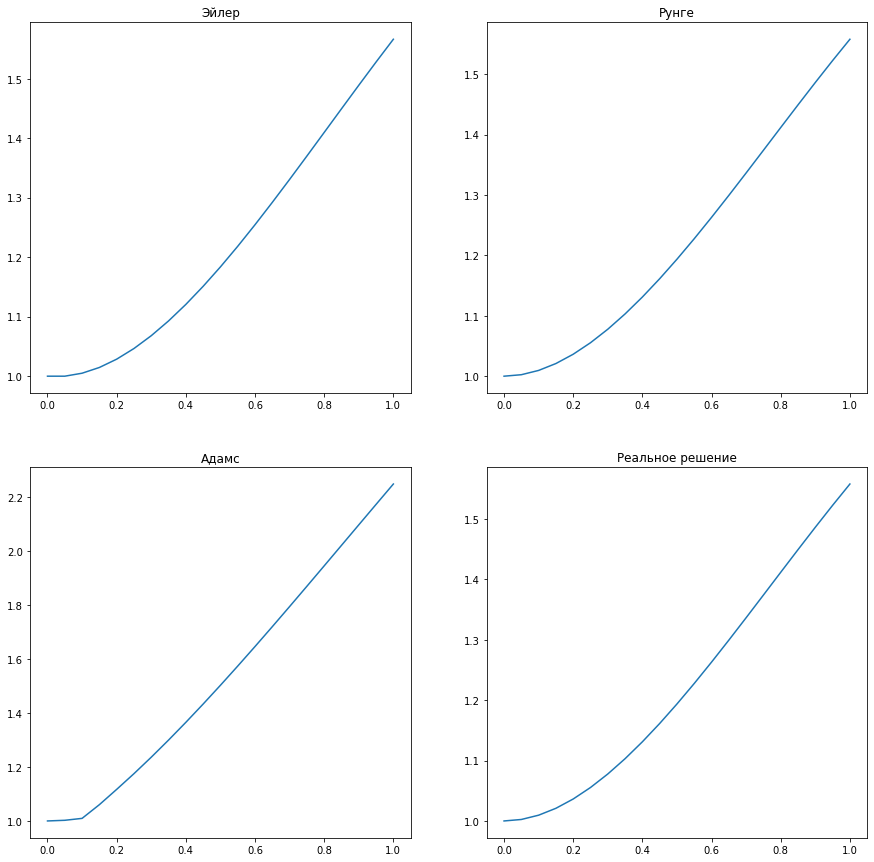

In [197]:
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(2,2,1)
plt.title('Эйлер')
plt.plot(nodes, euler(nodes,U_a,system))

plt.subplot(2,2,2)
plt.title('Рунге')
plt.plot(nodes, runge_kutta_4(nodes,U_a,system))

plt.subplot(2,2,3)
plt.title('Адамс')
plt.plot(nodes, adams_3(nodes,U_a,system))

plt.subplot(2,2,4)
plt.title('Реальное решение')
plt.plot(nodes, [U0_x(i) for i in nodes])

plt.show()

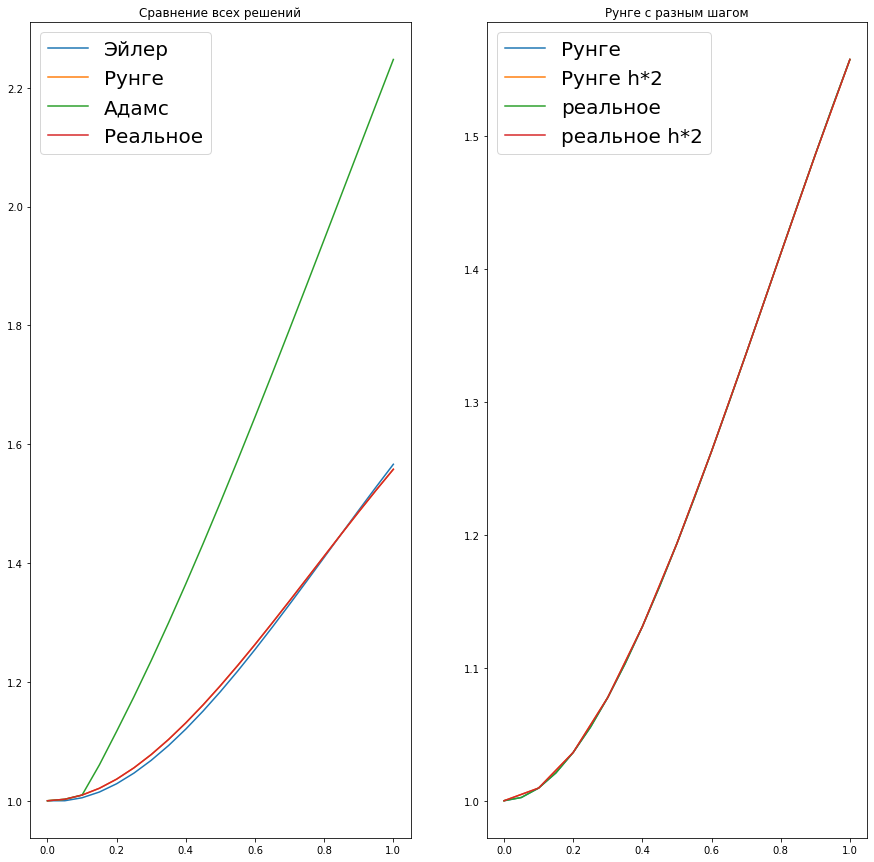

In [198]:
plt.subplot(1,2,1)
plt.title("Сравнение всех решений")
plt.plot(nodes, euler(nodes,U_a,system), label='Эйлер')
plt.plot(nodes, runge_kutta_4(nodes,U_a,system), label='Рунге')
plt.plot(nodes, adams_3(nodes,U_a,system), label='Адамс')
plt.plot(nodes, [U0_x(i) for i in nodes], label='Реальное')
plt.legend()

plt.subplot(1,2,2)
plt.title('Рунге с разным шагом')
plt.plot(nodes, runge_kutta_4(nodes,U_a,system), label = 'Рунге')
plt.plot(nodes1, runge_kutta_4(nodes1,U_a,system), label = 'Рунге h*2')
plt.plot(nodes, [U0_x(i) for i in nodes], label = 'реальное')
plt.plot(nodes1, [U0_x(i) for i in nodes1], label = 'реальное h*2')
plt.legend()



plt.show()

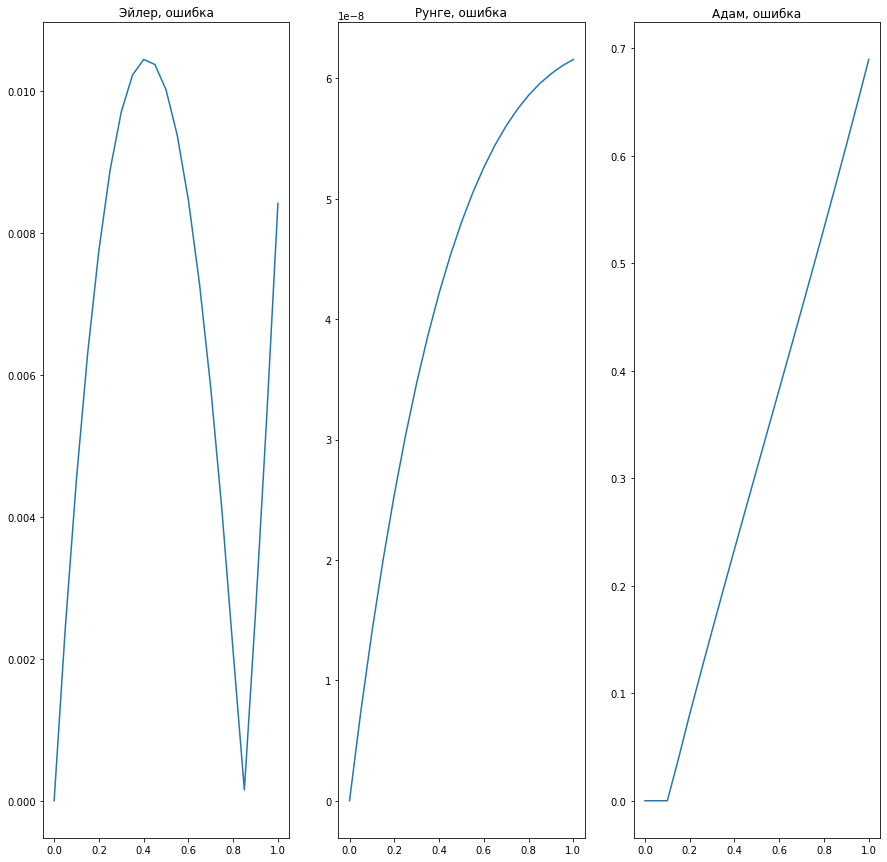

In [196]:
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(1,3,1)
plt.title('Эйлер, ошибка')
plt.plot(nodes, np.abs(euler(nodes,U_a,system) - [U0_x(i) for i in nodes]))

plt.subplot(1,3,2)
plt.title('Рунге, ошибка')
plt.plot(nodes, np.abs(runge_kutta_4(nodes,U_a,system) - [U0_x(i) for i in nodes]))

plt.subplot(1,3,3)
plt.title('Адам, ошибка')
plt.plot(nodes, np.abs(adams_3(nodes,U_a,system) - [U0_x(i) for i in nodes]))


plt.show()

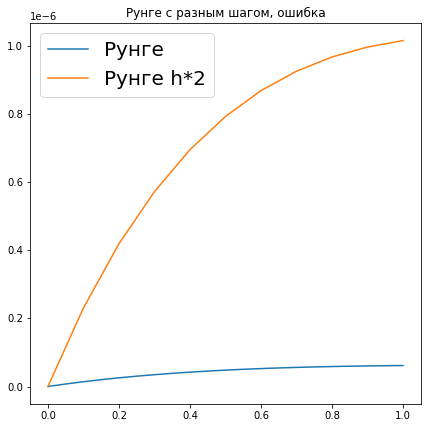

In [208]:
plt.rcParams["figure.figsize"] = (7,7)
plt.title('Рунге с разным шагом, ошибка')
plt.plot(nodes, np.abs(runge_kutta_4(nodes,U_a,system) - [U0_x(i) for i in nodes]), label = 'Рунге')
plt.plot(nodes1, np.abs(runge_kutta_4(nodes1,U_a,system) -  [U0_x(i) for i in nodes1]), label = 'Рунге h*2')

plt.legend()

plt.show()

In [206]:
print(np.abs([i**(h1/2) - i**h1  for i in runge_kutta_4(nodes1,U_a,system)])/15)
print(np.abs(runge_kutta_4(nodes1,U_a,system) -  [U0_x(i) for i in nodes1]))

[0.00000000e+00 3.16844469e-05 1.19376054e-04 2.51033548e-04
 4.14407775e-04 5.98099552e-04 7.92149085e-04 9.88232338e-04
 1.17959796e-03 1.36086821e-03 1.52779082e-03]
[0.00000000e+00 2.30645094e-07 4.19024563e-07 5.72090700e-07
 6.95184890e-07 7.92686632e-07 8.68358305e-07 9.25539756e-07
 9.67264273e-07 9.96331163e-07 1.01535316e-06]


In [ ]:
#Метод Эйлера неплохо находит решение
#Как и предпологалось Метод Рунге-Кутта находит решение наиболее точно
#Метод Адамса слишком быстро накапливает ошибку
#Правило Рунге и правда довольно грубо оценивает точность